In [1]:
# pip install mplfinance

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as pdr
from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime

In [3]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web
plt.style.use('fivethirtyeight')

In [4]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime.today()


In [5]:
apl = web.DataReader('AAPL', 'yahoo', start, end)
googl = web.DataReader('GOOGL', 'yahoo', start, end)
amzn = web.DataReader('AMZN', 'yahoo', start, end)
mst = web.DataReader('MSFT', 'yahoo', start, end)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
gs = web.DataReader('GS', 'yahoo', start, end)
jpmc = web.DataReader('JPM', 'yahoo', start, end)


In [6]:
# pdr. used for getting data from (website) 

#apl = pdr.get_data_yahoo('AAPL')
apl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.880692
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644018
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949759
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952011
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287872


In [7]:
apl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
type(apl)

pandas.core.frame.DataFrame

In [9]:
apl.index

DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19'],
              dtype='datetime64[ns]', name='Date', length=1923, freq=None)

In [10]:
# we take stk value from 2020-07-01 to 2022-07-01
index = apl.loc['2020-07-01':'2022-07-01'].index
index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13',
               '2020-07-14', '2020-07-15',
               ...
               '2022-06-17', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [11]:
# stk value for two year 2020 to 2022
Adj_close = apl.loc['2020-07-01':'2022-07-01']['Adj Close']
Adj_close

Date
2020-07-01     89.779892
2020-07-02     89.779892
2020-07-06     92.181526
2020-07-07     91.895508
2020-07-08     94.035759
                 ...    
2022-06-27    141.463501
2022-06-28    137.249359
2022-06-29    139.036865
2022-06-30    136.530350
2022-07-01    138.737274
Name: Adj Close, Length: 505, dtype: float64

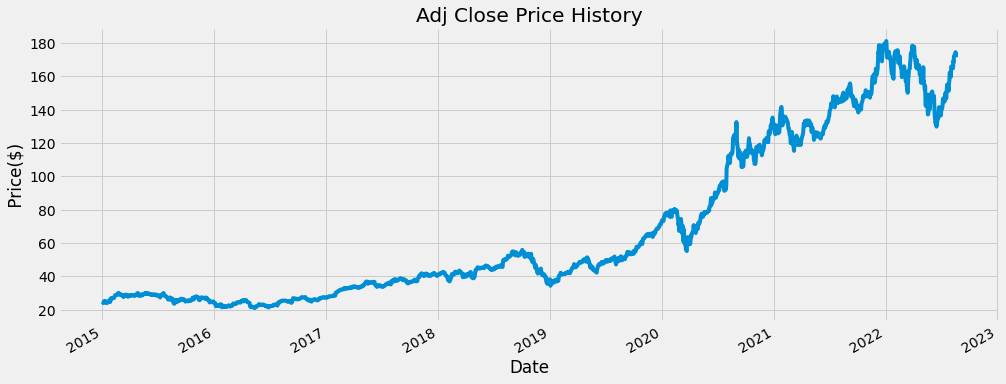

In [12]:
# close price history plot

apl['Adj Close'].plot(title='Adj Close Price History',ylabel= ' Price($) ',figsize=(15,6));

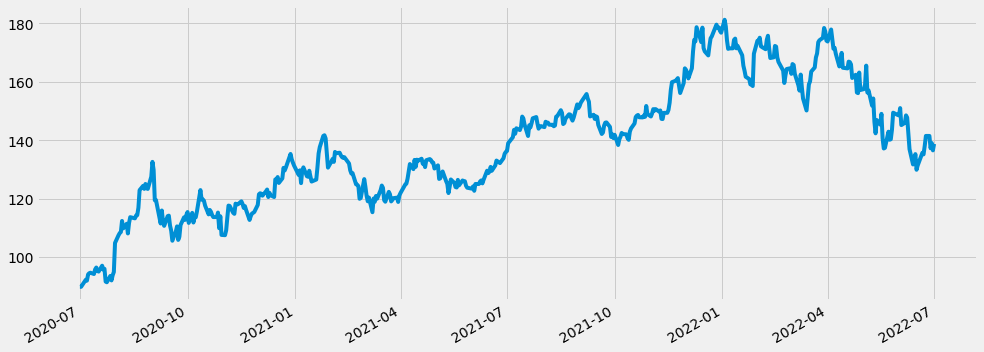

In [13]:
# plot for two year data(2020 to 2022)
figure,ax = plt.subplots(figsize=(15,6))

plt.tight_layout

figure.autofmt_xdate()

ax.plot(index,Adj_close);

Observation : here we note the trend in entire data and in two year data

# datetime

In [14]:
import datetime
from datetime import datetime



datetime.now()    # y,m,d,hr,min,sec,microsec.

datetime.datetime(2022, 8, 21, 1, 48, 55, 257932)

In [15]:
# annual min value
apl.resample(rule='A').min()     

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.880692
2015-12-31,26.757500,23.000000,23.717501,25.780001,52185600.0,23.539507
2016-12-31,22.917500,22.367500,22.500000,22.584999,45903600.0,20.949608
2017-12-31,29.082500,28.690001,28.950001,29.004999,56106800.0,27.189367
2018-12-31,37.887501,36.647499,37.037498,36.707500,50055600.0,35.487957
2019-12-31,36.430000,35.500000,35.994999,35.547501,45448000.0,34.366505
2020-12-31,57.125000,53.152500,57.020000,56.092499,46691300.0,55.174358
2021-12-31,120.400002,116.209999,119.029999,116.360001,41000000.0,115.342575
2022-12-31,132.389999,129.039993,130.070007,130.059998,53623900.0,129.879593


In [16]:
# annual max vlue
apl.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.880692
2015-12-31,33.634998,32.849998,33.615002,33.250000,648825200.0,30.118963
2016-12-31,29.672501,29.362499,29.545000,29.562500,533478800.0,27.570419
2017-12-31,44.299999,43.715000,43.777500,44.105000,447940000.0,42.008999
2018-12-31,58.367500,57.445000,57.695000,58.017502,384986800.0,55.894951
2019-12-31,73.492500,72.379997,72.779999,73.412498,365248800.0,72.039894
2020-12-31,138.789993,134.339996,138.050003,136.690002,426510000.0,135.292664
2021-12-31,182.130005,178.529999,181.119995,180.330002,195432700.0,179.586868
2022-12-31,182.940002,179.119995,182.630005,182.009995,182602000.0,181.259918


In [17]:
# annual mean value
apl.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,1.656136e+08,24.880692
2015-12-31,30.311131,29.715774,30.043938,30.010000,2.073976e+08,27.294871
2016-12-31,26.356796,25.922569,26.126944,26.151002,1.536901e+08,24.278157
2017-12-31,37.851514,37.371912,37.611225,37.637769,1.085383e+08,35.601321
2018-12-31,47.748526,46.795877,47.277859,47.263357,1.360803e+08,45.387335
2019-12-31,52.457927,51.567907,51.967272,52.063988,1.121228e+08,50.786469
2020-12-31,96.661769,93.912796,95.267668,95.347075,1.575646e+08,94.072188
2021-12-31,142.347818,139.474087,140.861866,140.989365,9.052463e+07,140.032758
2022-12-31,161.342579,157.122956,159.135912,159.331132,8.908982e+07,158.962450


<AxesSubplot:title={'center':' Annuall Trend of max.(Adj Close Price) '}, xlabel='Date', ylabel='Price($)'>

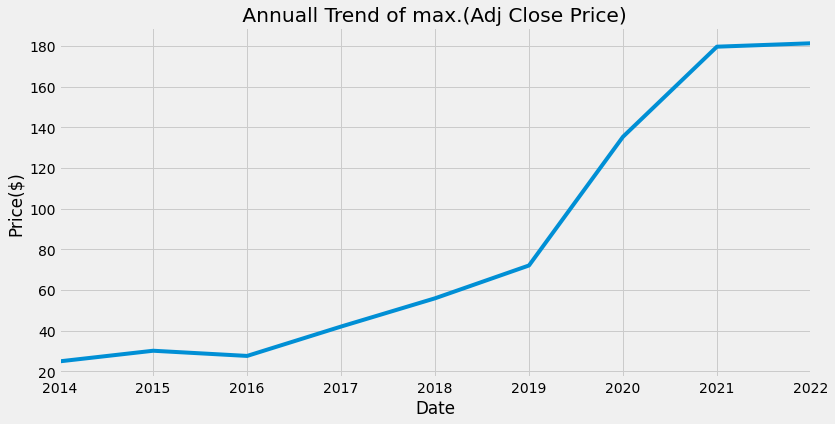

In [18]:
# plot for anuual max value trend
apl.resample(rule='A').max()['Adj Close'].plot(title=' Annuall Trend of max.(Adj Close Price) ',ylabel= 'Price($)',figsize=(12,6))          # yearly plot

<AxesSubplot:title={'center':' Quaterly Trend of max.(Adj Close Price) '}, xlabel='Date', ylabel='Price($)'>

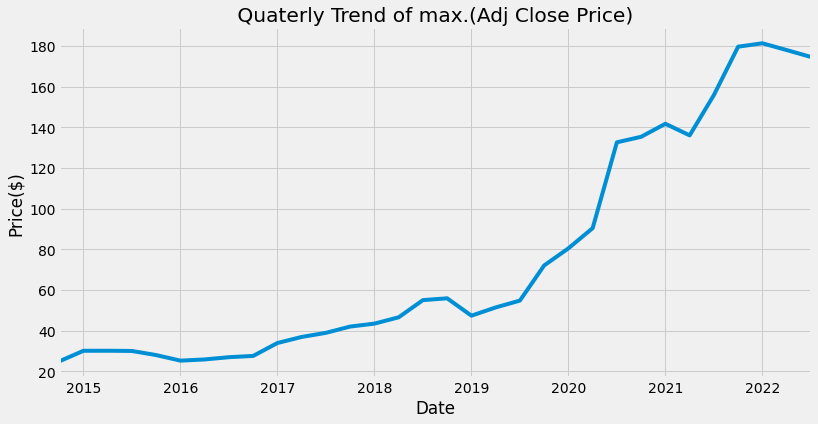

In [19]:
# quaterly max value trend
apl.resample(rule='QS').max()['Adj Close'].plot(title=' Quaterly Trend of max.(Adj Close Price) ',ylabel= 'Price($)',figsize=(12,6))          # quaterly plot

<AxesSubplot:title={'center':' Monthly Trend of max.(Adj Close Price) '}, xlabel='Date', ylabel='Price($)'>

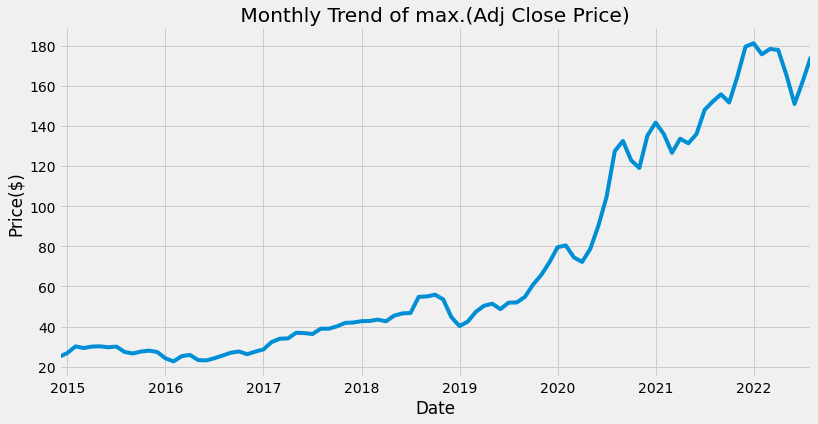

In [20]:
# plot for monthly max value
apl.resample(rule='M').max()['Adj Close'].plot(title=' Monthly Trend of max.(Adj Close Price) ',ylabel= 'Price($)',figsize=(12,6))              # monthly plot

<AxesSubplot:title={'center':' Quaterly mean of Adj Close Price '}, xlabel='Date', ylabel='Price($)'>

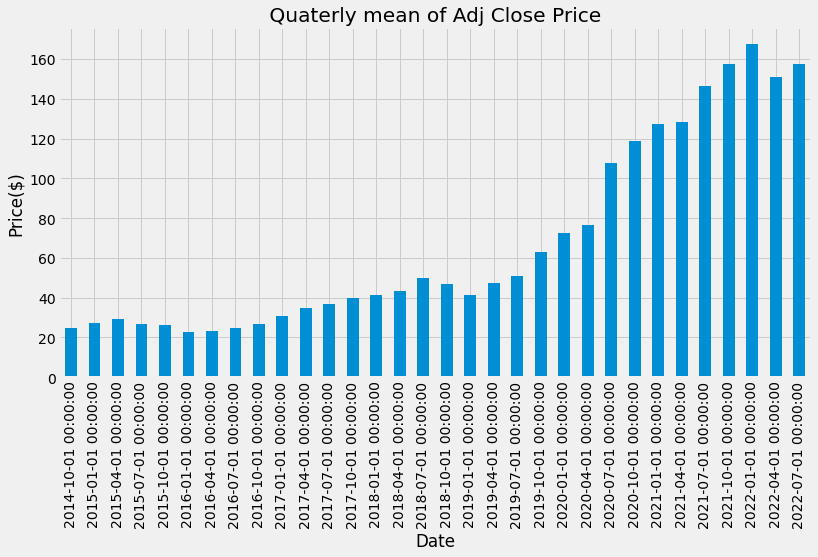

In [21]:
# histogram plot for quaterly data

figure.autofmt_xdate()

apl['Adj Close'].resample(rule='QS').mean().plot(kind='bar',title=' Quaterly mean of Adj Close Price ',ylabel= 'Price($)',figsize=(12,6))

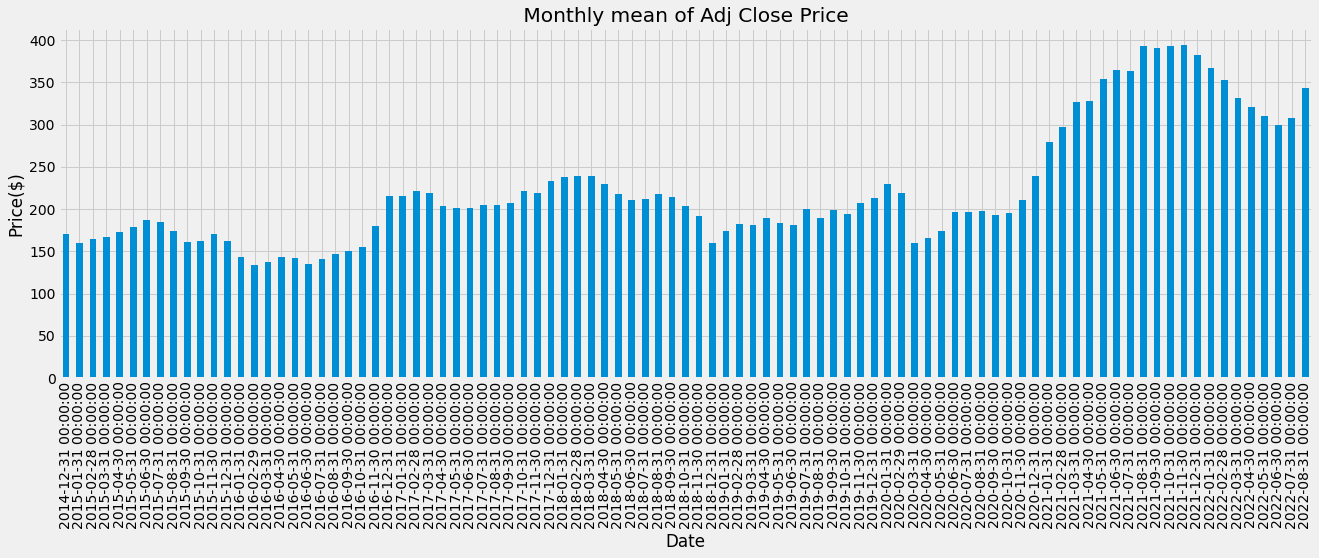

In [22]:
# hist plot for montly data
gs['Adj Close'].resample(rule='M').mean().plot(kind='bar',title=' Monthly mean of Adj Close Price ',ylabel= 'Price($)',figsize=(20,6))
figure.autofmt_xdate()

<AxesSubplot:title={'center':' Annually mean of Adj Close Price '}, xlabel='Date', ylabel='Price($)'>

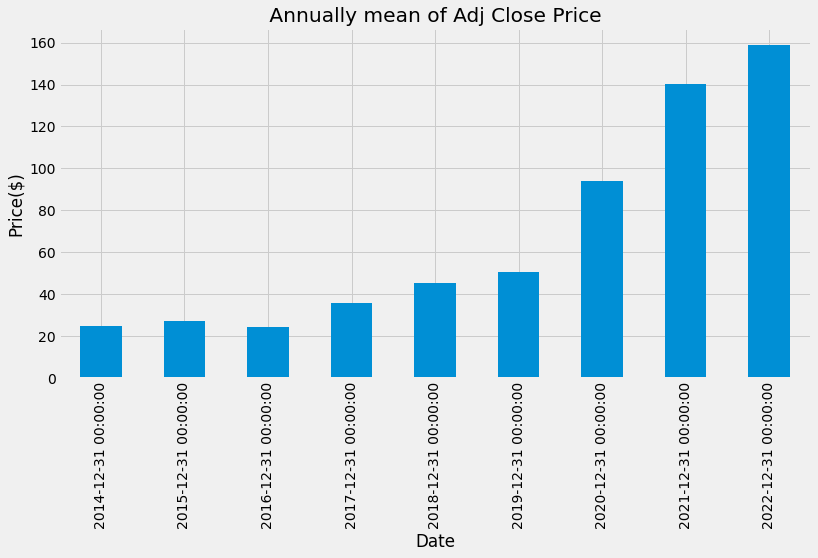

In [23]:
# hist plot 
apl['Adj Close'].resample(rule='A').mean().plot(kind='bar',title=' Annually mean of Adj Close Price ',ylabel= 'Price($)',figsize=(12,6))

In [24]:
# quaterly max value
apl.resample(rule='QS').max()['Adj Close']

Date
2014-10-01     24.880692
2015-01-01     30.097780
2015-04-01     30.118963
2015-07-01     30.012152
2015-10-01     27.979410
2016-01-01     25.252924
2016-04-01     25.838381
2016-07-01     26.945560
2016-10-01     27.570419
2017-01-01     33.921059
2017-04-01     36.892395
2017-07-01     38.923546
2017-10-01     42.008999
2018-01-01     43.447453
2018-04-01     46.557533
2018-07-01     55.001389
2018-10-01     55.894951
2019-01-01     47.354340
2019-04-01     51.398243
2019-07-01     54.781116
2019-10-01     72.039894
2020-01-01     80.461075
2020-04-01     90.376610
2020-07-01    132.579559
2020-10-01    135.292664
2021-01-01    141.696503
2021-04-01    135.993073
2021-07-01    155.816879
2021-10-01    179.586868
2022-01-01    181.259918
2022-04-01    177.931046
2022-07-01    174.550003
Freq: QS-JAN, Name: Adj Close, dtype: float64

 observation max close price of apple stock is on 01-01-2021 is (181.26)

In [25]:
# quaterly min value
apl.resample(rule='QS').min()['Adj Close']

Date
2014-10-01     24.880692
2015-01-01     23.891150
2015-04-01     28.117666
2015-07-01     23.539507
2015-10-01     24.130865
2016-01-01     21.416546
2016-04-01     20.949608
2016-07-01     22.027933
2016-10-01     24.773212
2017-01-01     27.189367
2017-04-01     33.111393
2017-07-01     33.732559
2017-10-01     36.415646
2018-01-01     36.944199
2018-04-01     38.809113
2018-07-01     44.143024
2018-10-01     35.487957
2019-01-01     34.366505
2019-04-01     42.227242
2019-07-01     47.110298
2019-10-01     53.555725
2020-01-01     55.174358
2020-04-01     59.241669
2020-07-01     89.779892
2020-10-01    107.472656
2021-01-01    115.342575
2021-04-01    121.903236
2021-07-01    136.300888
2021-10-01    138.364655
2022-01-01    150.190399
2022-04-01    129.879593
2022-07-01    138.737274
Freq: QS-JAN, Name: Adj Close, dtype: float64

Observation: min stock price is 2016-04-01  =   20.949608

# model for stock price 

In [26]:
apl.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.880692
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644018
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949759
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952011
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287872


In [27]:
# create x and y data  

x = apl.drop("Adj Close",axis=1)
y = apl["Adj Close"]

In [28]:
from sklearn.model_selection import train_test_split


# Import the Ridge model class from the linear_model module

In [29]:
# Import the Ridge model class from the linear_model module
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


# Setup random seed
np.random.seed(42)

# Create the data
x = apl.drop("Adj Close",axis=1)
y = apl["Adj Close"]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model (on the training set)
model=Ridge(max_iter=100)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

# Make predictions
Rg_pred = model.predict(x_test)

# Evaluate the model
print("Regression Ridge model test set:")
print((score))
print(f"R^2: {r2_score(y_test, Rg_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, Rg_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, Rg_pred):.2f}")


Regression Ridge model test set:
0.9999321080815357
R^2: 1.00
MAE: 0.31
MSE: 0.15


In [30]:
# Ridge model predicted value
Rg_pred = model.predict(x_test)
Rg_pred[:10]

array([ 73.50274548, 129.58757191,  36.73756647,  27.97929601,
        25.12766878,  48.40753747,  32.23709792,  25.86889184,
        24.42707296,  37.77098171])

In [31]:
# creating dataframe
y_test=pd.DataFrame(y_test)
y_test.head()

,Adj Close
Date,
2020-01-02,73.683563
2021-06-14,129.558807
2017-06-06,36.502449
2017-01-17,28.122084
2016-08-22,25.299503


In [32]:
y_test['Ridge_prediction'] = Rg_pred

In [33]:
y_test.head()

,Adj Close,Ridge_prediction
Date,,
2020-01-02,73.683563,73.502745
2021-06-14,129.558807,129.587572
2017-06-06,36.502449,36.737566
2017-01-17,28.122084,27.979296
2016-08-22,25.299503,25.127669


Observation : these comparision between real and predicted

In [34]:
y_test.tail()

,Adj Close,Ridge_prediction
Date,,
2021-09-03,153.440186,153.525695
2016-09-20,26.479261,26.346653
2017-04-06,33.812790,34.025899
2021-12-01,164.090988,164.367963
2017-05-05,35.060230,35.339591


In [35]:
y_test[:10]

,Adj Close,Ridge_prediction
Date,,
2020-01-02,73.683563,73.502745
2021-06-14,129.558807,129.587572
2017-06-06,36.502449,36.737566
2017-01-17,28.122084,27.979296
2016-08-22,25.299503,25.127669
2019-04-10,48.696648,48.407537
2017-02-21,32.174629,32.237098
2016-11-29,26.120731,25.868892
2016-08-01,24.592720,24.427073


In [36]:
# compare prediction and real truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test['Adj Close'],y_test['Ridge_prediction'])

0.3117490877016088

Observation : MAE (Ridge model) is 30.32% 

# linear model Lasso

In [37]:
# linear model Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = apl.drop("Adj Close", axis=1)
y = apl["Adj Close"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = linear_model.Lasso()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

# Make predictions
Lso_pred = model.predict(x_test)

# Evaluate the model
print("Regression linear Lasso model test set:")
print((score))
print(f"R^2: {r2_score(y_test, Lso_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, Lso_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, Lso_pred):.2f}")

Regression linear Lasso model test set:
0.9996787335344824
R^2: 1.00
MAE: 0.58
MSE: 0.72


In [38]:
# creating dataframe
Lasso = pd.DataFrame(y_test)
Lasso.head()

,Adj Close
Date,
2020-01-02,73.683563
2021-06-14,129.558807
2017-06-06,36.502449
2017-01-17,28.122084
2016-08-22,25.299503


In [39]:
Lasso['Lasso_prediction'] = Lso_pred
Lasso.head()

,Adj Close,Lasso_prediction
Date,,
2020-01-02,73.683563,72.959003
2021-06-14,129.558807,128.395841
2017-06-06,36.502449,36.844283
2017-01-17,28.122084,27.865797
2016-08-22,25.299503,25.213111


In [40]:
# Two model comparision
Lasso['Ridge_prediction'] = Rg_pred
Lasso.head()

,Adj Close,Lasso_prediction,Ridge_prediction
Date,,,
2020-01-02,73.683563,72.959003,73.502745
2021-06-14,129.558807,128.395841,129.587572
2017-06-06,36.502449,36.844283,36.737566
2017-01-17,28.122084,27.865797,27.979296
2016-08-22,25.299503,25.213111,25.127669


#  RandomForestRegressor model class from the ensemble module

In [41]:
# Import the RandomForestRegressor model class from the ensemble module

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
x = apl.drop("Adj Close",axis=1)
y = apl["Adj Close"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(x_test, y_test)


# Make predictions
RFR_pred = model.predict(x_test)

# Evaluate the model
print("RandomForestRegressor model test set:")
print((score))
print(f"R^2: {r2_score(y_test, RFR_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, RFR_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, RFR_pred):.2f}")


RandomForestRegressor model test set:
0.9996787335344824
R^2: 1.00
MAE: 0.25
MSE: 0.12


In [42]:
Lasso['RandomForestRegressor_pred'] = RFR_pred

In [43]:
Lasso.reset_index(inplace= True)

In [44]:
Lasso.head()

,Date,Adj Close,Lasso_prediction,Ridge_prediction,RandomForestRegressor_pred
0,2020-01-02,73.683563,72.959003,73.502745,73.583638
1,2021-06-14,129.558807,128.395841,129.587572,129.210744
2,2017-06-06,36.502449,36.844283,36.737566,36.840205
3,2017-01-17,28.122084,27.865797,27.979296,27.379154
4,2016-08-22,25.299503,25.213111,25.127669,25.129615


 Observation

 RandomForestRegressor model test set:
 0.9997735733491858,
 R^2: 1.00,
 MAE: 0.24,
 MSE: 0.12,

 Regression linear Lasso model test set:
 0.9997735733491858,
 R^2: 1.00,
 MAE: 0.51,
 MSE: 0.50,
    
 Regression Ridge model test set:
 0.9999328274802965,
 R^2: 1.00,
 MAE: 0.31,
 MSE: 0.15

<AxesSubplot:title={'center':'Final prediction using different ML model'}, xlabel='Date', ylabel='Price ($)'>

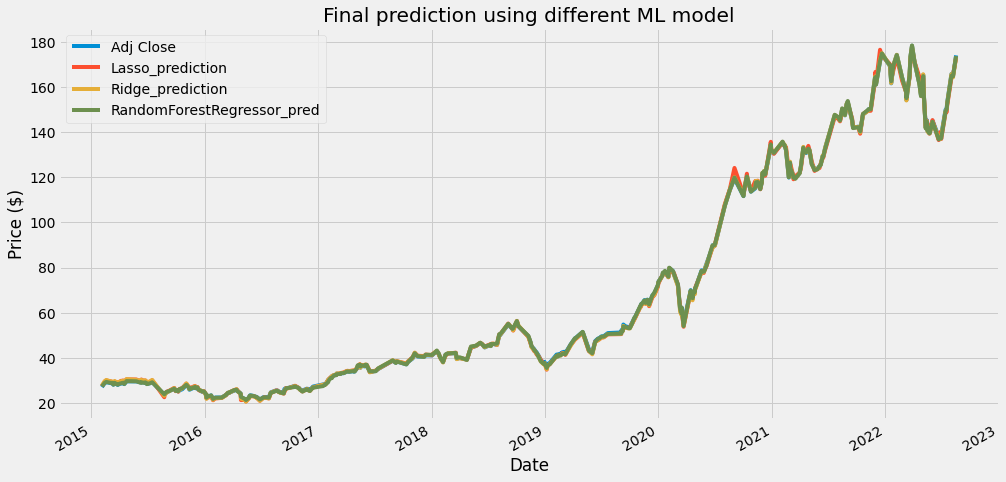

In [45]:
# Predicted data visulisation
Lasso.index = y_test.index
figure.autofmt_xdate()
Lasso[['Adj Close','Lasso_prediction','Ridge_prediction','RandomForestRegressor_pred']].plot(title='Final prediction using different ML model',ylabel='Price ($)',figsize=(15,8))